# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

dir_main = "/Users/Kellie/Documents/data301/proj/"
data_dir = dir_main + "datasets/"
data_final_dir = data_dir + "final/"

month_df = pd.read_csv(data_final_dir + "ks201901.csv").set_index("id")
month_df.head()

,backers_count,blurb,country,created_at,currency,deadline,goal,launched_at,name,pledged,...,usd_pledged,parent_category,category,created_at_clean,state_changed_at_clean,launched_at_clean,deadline_clean,project_duration,time_til_state_changed,avg_pledge
id,,,,,,,,,,,,,,,,,,,,,
1504859185,1,An eco-friendly coffee table that is both func...,US,1473631551,USD,1480966943,5000.0,1478371343,Industrial Bamboo Table,240.0,...,240.000000,crafts,woodworking,2016-09-11 22:05:51,2016-12-05 19:42:23,2016-11-05 18:42:23,2016-12-05 19:42:23,84 days 21:36:32.000000000,84 days 21:36:32.000000000,240.000000
49266114,3,We take digital uploads and make them handpain...,CA,1436540372,CAD,1440417634,1000.0,1437480034,"Custom Pet Portraits on Canvas- ""From Pixels t...",322.0,...,247.950175,art,painting,2015-07-10 14:59:32,2015-08-24 12:00:34,2015-07-21 12:00:34,2015-08-24 12:00:34,44 days 21:01:02.000000000,44 days 21:01:02.000000000,82.650058
1228074690,243,We are a team of restaurant pros looking to fu...,US,1427218874,USD,1431706954,35000.0,1429114954,The Barmobile: Boston's Mobile Cocktail Cateri...,41738.0,...,41738.000000,food,food trucks,2015-03-24 17:41:14,2015-05-15 16:22:34,2015-04-15 16:22:34,2015-05-15 16:22:34,51 days 22:41:20.000000000,51 days 22:41:20.000000000,171.761317
330962986,27,"Loosely-based on a Lakota legend, Grandfather ...",US,1495110632,USD,1500217383,3000.0,1496329383,Grandfather Thunder & The Night Horses,3115.0,...,3115.000000,publishing,children's books,2017-05-18 12:30:32,2017-07-16 15:03:04,2017-06-01 15:03:03,2017-07-16 15:03:03,59 days 02:32:31.000000000,59 days 02:32:32.000000000,115.370370
1657821447,3,Save me is a feature film about a depression s...,IE,1450121921,EUR,1455328590,15000.0,1450144590,Save Me-A film to hightlight depression (Cance...,601.0,...,660.680598,film & video,movie theaters,2015-12-14 19:38:41,2016-02-10 00:54:26,2015-12-15 01:56:30,2016-02-13 01:56:30,60 days 06:17:49.000000000,57 days 05:15:45.000000000,220.226866


## Visualizations

_There are numerous outliers in this dataset, which have made visualizations somewhat challenging. In an effort to make trends visible, many of the following visualizations have been "zoomed in" to frame the majority of the data in a larger window._

We began with a hypothesis that the money associated with a campaign could indicate who supports it. We figured that for a project to be successful, it would need to attract money from strangers who are interested in the product, not just friends and family interested in supporting the entrepreneurs. We examined the `backers_count` and `usd_pledged` to conduct this analysis.

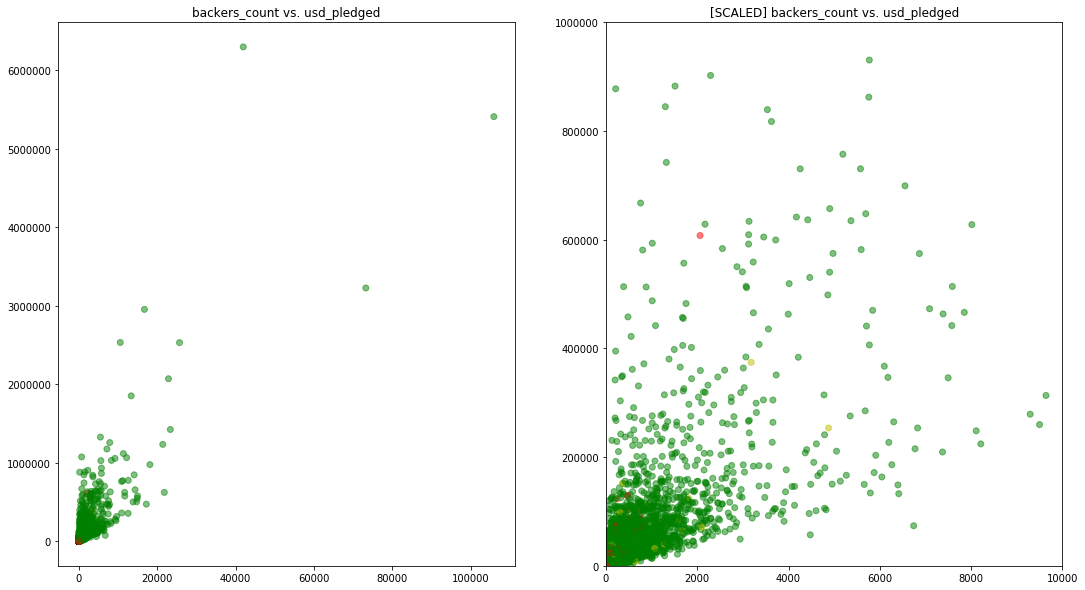

In [2]:
state_colors = month_df.state.map({
    "successful": "g",
    "failed": "r",
    "canceled": "r",
    "live": "y",
    "suspended": "r"
})

f, ax = plt.subplots(1,2,figsize=(18,10))
raw_ax = ax[0]

raw_ax.set_title("backers_count vs. usd_pledged")
raw_ax.scatter(x=month_df.backers_count, y=month_df.usd_pledged,
               c=state_colors, alpha=0.5)

scaled_ax = ax[1]
scaled_ax.set_xlim(left=0, right=10000)
scaled_ax.set_ylim(bottom=0, top=1000000)

scaled_ax.set_title("[SCALED] backers_count vs. usd_pledged")
scaled_ax.scatter(x=month_df.backers_count, y=month_df.usd_pledged,
                  c=state_colors, alpha=0.5)

There's a strong positive correlation between the number of backers and the amount of money pledged, which was the obvious result we expected.

Text(0.5, 1.0, '[SCALED] usd_pledged by state')

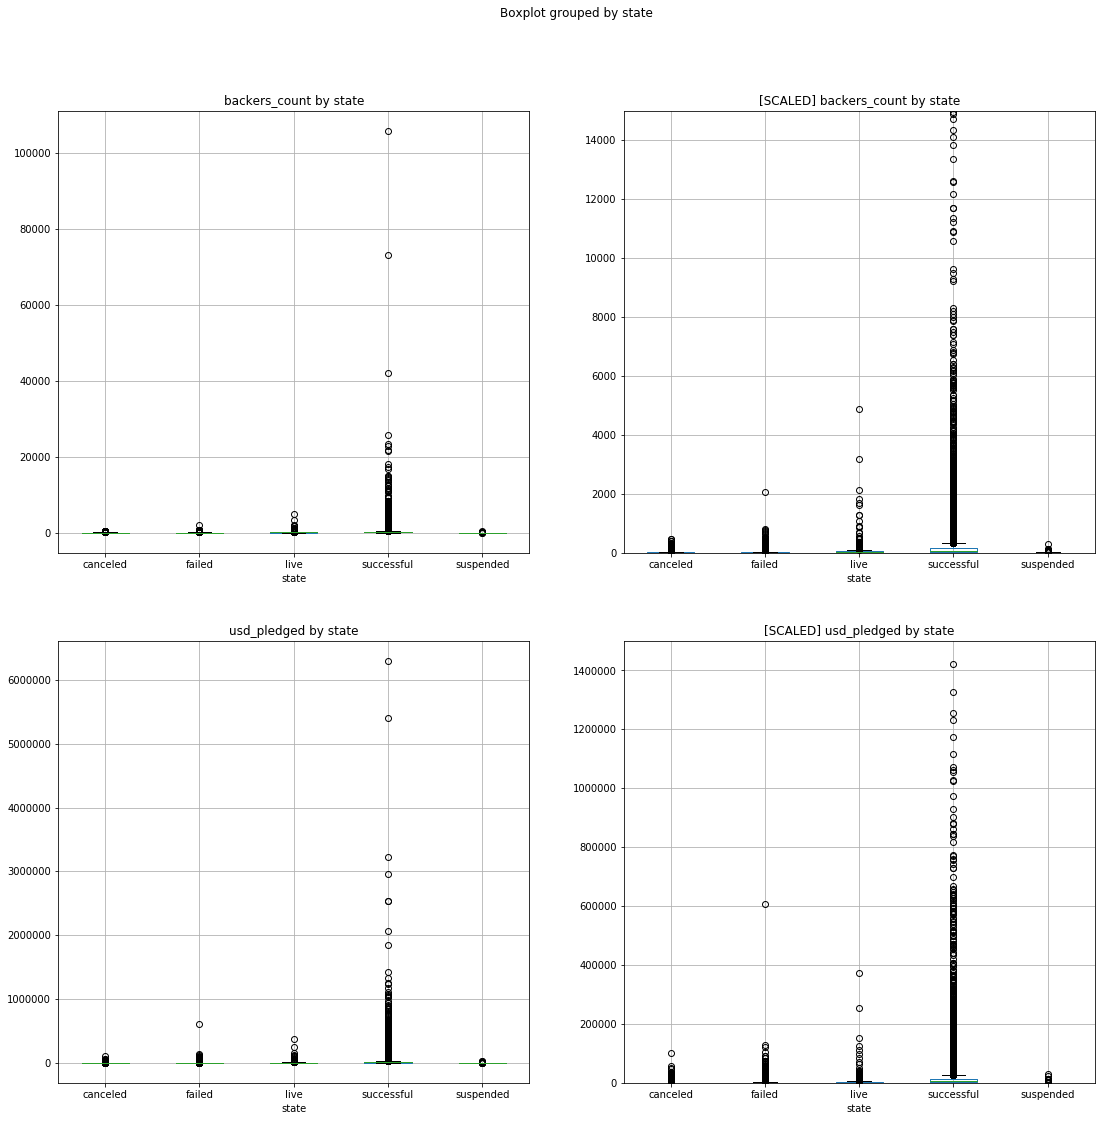

In [3]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,2, figsize=(18,18))

backers_raw = ax[0][0]
month_df.boxplot(column="backers_count", by="state", ax=backers_raw)
backers_raw.set_title("backers_count by state")

backers_scaled = ax[0][1]
backers_scaled.set_ylim(top=15000)
month_df.boxplot(column="backers_count", by="state", ax=backers_scaled)
backers_scaled.set_title("[SCALED] backers_count by state")

usd_raw = ax[1][0]
month_df.boxplot(column="usd_pledged", by="state", ax=usd_raw)
usd_raw.set_title("usd_pledged by state")

usd_scaled = ax[1][1]
usd_scaled.set_ylim(top=1500000)
month_df.boxplot(column="usd_pledged", by="state", ax=usd_scaled)
usd_scaled.set_title("[SCALED] usd_pledged by state")

On test data, it won't make sense to use `backers_count` and `usd_pledged`, since the projects are still live and these variables will change frequently. We can control that variability by calculating a project's average pledge. Since many kickstarter projects sell special offers for backers who pledge a certain amount, we expect that higher average pledges indicate more compelling products.

In [4]:
month_df["avg_pledge"] = (month_df.usd_pledged /
                          month_df.backers_count).fillna(0)
month_df.head()

,backers_count,blurb,country,created_at,currency,deadline,goal,launched_at,name,pledged,...,usd_pledged,parent_category,category,created_at_clean,state_changed_at_clean,launched_at_clean,deadline_clean,project_duration,time_til_state_changed,avg_pledge
id,,,,,,,,,,,,,,,,,,,,,
1504859185,1,An eco-friendly coffee table that is both func...,US,1473631551,USD,1480966943,5000.0,1478371343,Industrial Bamboo Table,240.0,...,240.000000,crafts,woodworking,2016-09-11 22:05:51,2016-12-05 19:42:23,2016-11-05 18:42:23,2016-12-05 19:42:23,84 days 21:36:32.000000000,84 days 21:36:32.000000000,240.000000
49266114,3,We take digital uploads and make them handpain...,CA,1436540372,CAD,1440417634,1000.0,1437480034,"Custom Pet Portraits on Canvas- ""From Pixels t...",322.0,...,247.950175,art,painting,2015-07-10 14:59:32,2015-08-24 12:00:34,2015-07-21 12:00:34,2015-08-24 12:00:34,44 days 21:01:02.000000000,44 days 21:01:02.000000000,82.650058
1228074690,243,We are a team of restaurant pros looking to fu...,US,1427218874,USD,1431706954,35000.0,1429114954,The Barmobile: Boston's Mobile Cocktail Cateri...,41738.0,...,41738.000000,food,food trucks,2015-03-24 17:41:14,2015-05-15 16:22:34,2015-04-15 16:22:34,2015-05-15 16:22:34,51 days 22:41:20.000000000,51 days 22:41:20.000000000,171.761317
330962986,27,"Loosely-based on a Lakota legend, Grandfather ...",US,1495110632,USD,1500217383,3000.0,1496329383,Grandfather Thunder & The Night Horses,3115.0,...,3115.000000,publishing,children's books,2017-05-18 12:30:32,2017-07-16 15:03:04,2017-06-01 15:03:03,2017-07-16 15:03:03,59 days 02:32:31.000000000,59 days 02:32:32.000000000,115.370370
1657821447,3,Save me is a feature film about a depression s...,IE,1450121921,EUR,1455328590,15000.0,1450144590,Save Me-A film to hightlight depression (Cance...,601.0,...,660.680598,film & video,movie theaters,2015-12-14 19:38:41,2016-02-10 00:54:26,2015-12-15 01:56:30,2016-02-13 01:56:30,60 days 06:17:49.000000000,57 days 05:15:45.000000000,220.226866


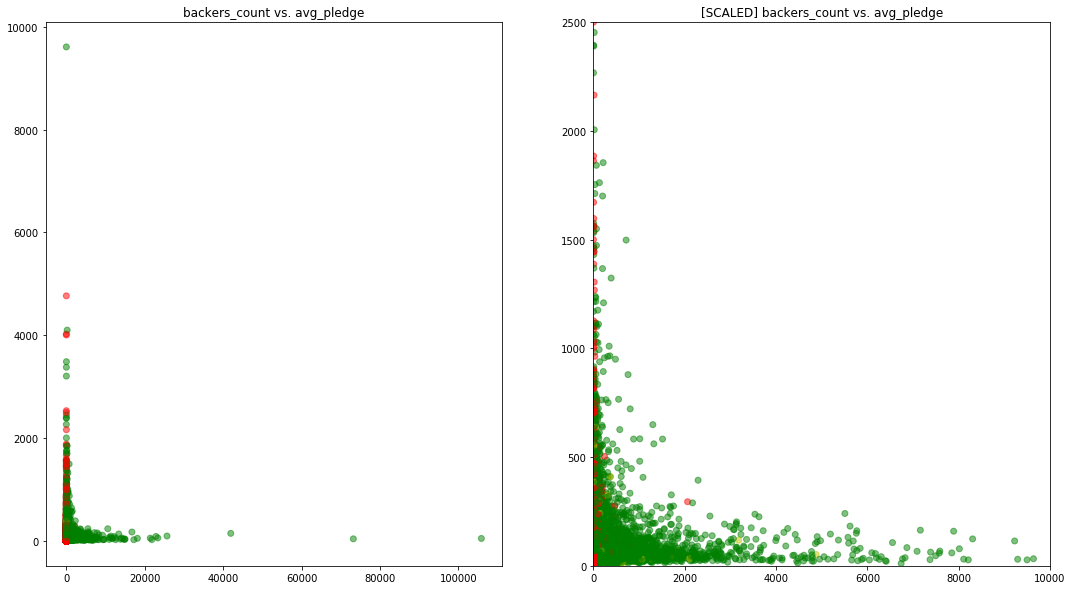

In [5]:
f, ax = plt.subplots(1,2,figsize=(18,10))

raw_ax = ax[0]
raw_ax.set_title("backers_count vs. avg_pledge")
raw_ax.scatter(x=month_df.backers_count, y=month_df.avg_pledge,
               c=state_colors, alpha=0.5)

scaled_ax = ax[1]
scaled_ax.set_xlim(left=0, right=10000)
scaled_ax.set_ylim(bottom=0, top=2500)
scaled_ax.set_title("[SCALED] backers_count vs. avg_pledge")
scaled_ax.scatter(x=month_df.backers_count, y=month_df.avg_pledge,
                  c=state_colors, alpha=0.5)

Indeed, we see that failed projects have small average pledges.

In [6]:
# save the new DataFrame with avg_pledge
month_df.to_csv(data_final_dir + "ks201901.csv")

## Temporal Analysis

As a sort of model validation technique, we thought it would be interesting to train and make predictions on our large January dataset, then compare those predictions to the results in February. The following functions collect February's observations, filter down to the variables that change over time, then join the two months. This code is based on the procedures completed in the data collection and cleaning notebook.

In [7]:
def file_name_from_num(num):
    s = "000"
    s += str(num)
    return "Kickstarter" + s[-3:] + ".csv"

In [8]:
import os

def collect_month_df(date):
    month_df = pd.DataFrame()
    folder_name = "Kickstarter_" + date + "/"
    
    cols = ["backers_count", "blurb", "category", "country", "created_at", "currency",
        "deadline", "goal", "id", "launched_at", "name", "pledged", "slug", "spotlight",
        "staff_pick", "state", "state_changed_at", "urls", "usd_pledged"]
    quant_vars = ["backers_count", "created_at", "deadline", "goal", "launched_at",
                  "pledged", "state_changed_at", "usd_pledged"]

    for ks in os.listdir(data_dir + folder_name):
        path = data_dir + folder_name + ks
        baby_df = pd.read_csv(path)[cols]
        month_df = pd.concat([month_df, baby_df], ignore_index=True)
        month_df.drop_duplicates(subset=["id"], inplace=True)
        month_df.reset_index(inplace=True)
        month_df = month_df.drop(["index"], axis=1)
    
    for qv in quant_vars:
        month_df[qv] = pd.to_numeric(month_df[qv])
        
    return month_df

In [9]:
def convert_strings_to_dict(month_df, cols=["category"]):
    for col in cols:
        month_df[col] = month_df[col].fillna('')
        month_df[col] = month_df[col].apply(ast.literal_eval)
    return month_df

In [10]:
import ast
from pandas.io.json import json_normalize

def clean_json(month_df, cols = ["category", "urls"]):
    month_df = convert_strings_to_dict(month_df)
    category_exp = json_normalize(month_df["category"])
    category_tups = category_exp.slug.str.split("/").apply(pd.Series)
    category_tups.columns = ["parent_category", "category"]
    month_df = month_df.drop("category", axis=1)
    month_df = pd.concat([month_df, category_tups], axis=1)
    return month_df

In [11]:
from datetime import datetime

def clean_timestamps(month_df, timestamps = ["created_at", "state_changed_at",
                                             "launched_at", "deadline"]):
    for ts in timestamps:
        month_df[ts] = month_df[ts].fillna("")
        month_df[ts + "_clean"] = month_df[ts].apply(datetime.utcfromtimestamp)
    return month_df

In [12]:
def calc_custom_vars(month_df):
    month_df["project_duration"] = month_df["deadline"] - month_df["created_at"]
    month_df["time_til_state_changed"] = (month_df["state_changed_at"] -
                                          month_df["created_at"])
    month_df["avg_pledge"] = (month_df.usd_pledged /
                              month_df.backers_count).fillna(0)
    return month_df

In [13]:
def clean_month_df(month_df):
    month_df = clean_json(month_df)
    month_df = clean_timestamps(month_df)
    month_df = calc_custom_vars(month_df)
    return month_df.set_index("id")

In [14]:
def create_df_for_month(date):
    month_df = collect_month_df(date)
    return clean_month_df(month_df)

In [15]:
second_month_df = create_df_for_month("2019-02-14")
second_month_df.head()

,backers_count,blurb,country,created_at,currency,deadline,goal,launched_at,name,pledged,...,usd_pledged,parent_category,category,created_at_clean,state_changed_at_clean,launched_at_clean,deadline_clean,project_duration,time_til_state_changed,avg_pledge
id,,,,,,,,,,,,,,,,,,,,,
1203770415,9,A comedy web series about the inherently funny...,US,1489891481,USD,1494132705,5000.0,1491540705,The Start Up,508.0,...,508.000000,film & video,comedy,2017-03-19 02:44:41,2017-05-07 04:51:45,2017-04-07 04:51:45,2017-05-07 04:51:45,4241224,4241224,56.444444
878861613,36,"Cabo y un Capitán, dos soldados villistas, tra...",MX,1508479978,MXN,1512917074,65000.0,1509893074,Los Muertos de Columbus // The Dead of Columbus,65247.0,...,3397.485019,film & video,shorts,2017-10-20 06:12:58,2017-12-10 14:44:34,2017-11-05 14:44:34,2017-12-10 14:44:34,4437096,4437096,94.374584
917345297,61,We're building the new home of Māori Theatre a...,NZ,1426499822,NZD,1429596000,10000.0,1427147079,Whare no name - the new home of Māori Theatre,10355.0,...,7834.340234,theater,NaN,2015-03-16 09:57:02,2015-04-21 06:00:12,2015-03-23 21:44:39,2015-04-21 06:00:00,3096178,3096190,128.431807
1702164653,1730,Comic-book stories celebrate women who crack c...,US,1482813229,USD,1489666144,40000.0,1487077744,Femme Magnifique,97447.0,...,97447.000000,comics,anthologies,2016-12-27 04:33:49,2017-03-16 12:09:04,2017-02-14 13:09:04,2017-03-16 12:09:04,6852915,6852915,56.327746
1042930184,183,"A Victorian “gaslamp” lesbian romance, set in ...",US,1506228739,USD,1510473540,2000.0,1507662001,Miss Bullard's School For Former Ladies,3911.0,...,3911.000000,games,video games,2017-09-24 04:52:19,2017-11-12 07:59:00,2017-10-10 19:00:01,2017-11-12 07:59:00,4244801,4244801,21.371585


In [16]:
second_month_df.to_csv(data_final_dir + "ks201902.csv")

In [17]:
second_slice = second_month_df[["backers_count", "staff_pick", "state",
                                "state_changed_at", "state_changed_at_clean",
                                "project_duration", "time_til_state_changed",
                                "usd_pledged", "avg_pledge"]]
merge_df = month_df.merge(second_slice, how="inner",
                          left_index=True, right_index=True,
                          suffixes=["201901", "201902"])
merge_df.head()

,backers_count201901,blurb,country,created_at,currency,deadline,goal,launched_at,name,pledged,...,avg_pledge201901,backers_count201902,staff_pick201902,state201902,state_changed_at201902,state_changed_at_clean201902,project_duration201902,time_til_state_changed201902,usd_pledged201902,avg_pledge201902
id,,,,,,,,,,,,,,,,,,,,,
1504859185,1,An eco-friendly coffee table that is both func...,US,1473631551,USD,1480966943,5000.0,1478371343,Industrial Bamboo Table,240.0,...,240.000000,1,False,failed,1480966943,2016-12-05 19:42:23,7335392,7335392,240.000000,240.000000
49266114,3,We take digital uploads and make them handpain...,CA,1436540372,CAD,1440417634,1000.0,1437480034,"Custom Pet Portraits on Canvas- ""From Pixels t...",322.0,...,82.650058,3,False,failed,1440417634,2015-08-24 12:00:34,3877262,3877262,247.950175,82.650058
1228074690,243,We are a team of restaurant pros looking to fu...,US,1427218874,USD,1431706954,35000.0,1429114954,The Barmobile: Boston's Mobile Cocktail Cateri...,41738.0,...,171.761317,243,True,successful,1431706954,2015-05-15 16:22:34,4488080,4488080,41738.000000,171.761317
330962986,27,"Loosely-based on a Lakota legend, Grandfather ...",US,1495110632,USD,1500217383,3000.0,1496329383,Grandfather Thunder & The Night Horses,3115.0,...,115.370370,27,False,successful,1500217384,2017-07-16 15:03:04,5106751,5106752,3115.000000,115.370370
1657821447,3,Save me is a feature film about a depression s...,IE,1450121921,EUR,1455328590,15000.0,1450144590,Save Me-A film to hightlight depression (Cance...,601.0,...,220.226866,3,False,canceled,1455065666,2016-02-10 00:54:26,5206669,4943745,660.680598,220.226866


In [18]:
states_changed_df = (merge_df.loc[merge_df.state201901 !=
                                  merge_df.state201902])
states_changed_df.shape

(359, 35)

In [19]:
states_changed_df.to_csv(data_final_dir + "ks201901-201902.csv")